In [61]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Summer 2022 Data Science Intern Challenge 

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!


## Question 1: Given some sample data, write a program to answer the following: 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \\$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


#### a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [62]:
# Read in sales data; check dataframe
sneakerdata = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")
sneakerdata.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773


In [63]:
# Calculater AOV
aov = sneakerdata["order_amount"].mean()
print(f"Average order value for all sneaker orders: ${aov}")

Average order value for all sneaker orders: $3145.128


The first consideration I would check for are outliers that are skewing the data, especially when looking at averages over so many different locations:

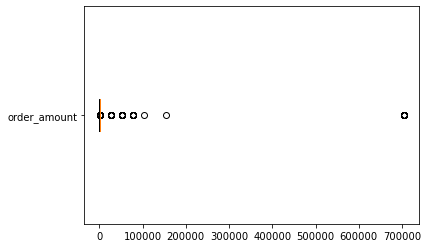

In [76]:
# Plot order amounts
plt.boxplot(sneakerdata["order_amount"],vert=False,labels=["order_amount"])
plt.show()

Sure enough, there are sales orders in the \\$700,000 range that are likely skewing the mean. Looking at the median, we can see there's a massive difference between it and the mean:

In [77]:
# Calculate median order value
mov = sneakerdata["order_amount"].median()
print(f"Median order value for all sneaker orders: ${mov}")

Median order value for all sneaker orders: $284.0


#### b.	What metric would you report for this dataset?

As seen above, the using mean as an average is heavily skewed by the higher-value sneakers. The median produces a much better representation of the average of the sneaker data when looking at the spread of the sales:

In [78]:
# Order amount descriptives
sneakerdata["order_amount"].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Using the median is an acceptable metric for tracking the average value of each order, though we still haven't addressed the underlying question of *why* the order amounts are so skewed. Knowing that each shop sells only a single sneaker, and presumably always at the same price, the order amount (ideally) is a function of the number of sneakers sold and the price of that sneaker. We have information on the number of items, but not on the individual price of each sneaker, so we can calculate that cost:

In [79]:
# Add sneaker cost column
sneakerdata["sneaker_cost"] = sneakerdata["order_amount"] / sneakerdata["total_items"]
sneakerdata["sneaker_cost"].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: sneaker_cost, dtype: float64

In [80]:
# Filter dataframe to each shop's sneaker cost
sneakerdata_sorted = sneakerdata.drop_duplicates(subset=["shop_id"])
sneakerdata_sorted = sneakerdata_sorted.sort_values("sneaker_cost", ascending=False)
sneakerdata_sorted.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,sneaker_cost
160,161.0,78.0,990.0,25725.0,1.0,credit_card,2017-03-12 05:56:56.834,25725.0
15,16.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-07 04:00:00.000,352.0
107,108.0,12.0,732.0,201.0,1.0,credit_card,2017-03-21 20:26:17.530,201.0
205,206.0,89.0,747.0,588.0,3.0,debit,2017-03-04 04:01:38.344,196.0
44,45.0,99.0,759.0,195.0,1.0,credit_card,2017-03-02 08:13:23.818,195.0


#### c.	What is its value?

Looking at the *sneaker_cost* column, we can see that Shop 78 has, by far, the most expensive sneaker, which skews the mean. Using the median (\\$153 for sneaker cost) produces a much more reasonable measure of average

## Question 2: For this question you’ll need to use SQL

#### a.	How many orders were shipped by Speedy Express in total?

Speedy Express (as ShipperID == 1) was the shipper for 54 orders in this dataset

#### b.	What is the last name of the employee with the most orders?

With 40 orders, EmployeeID 4 has the most orders and the last name Peacock

#### c.	What product was ordered the most by customers in Germany?

For customers who are located in Germany, the most ordered product is ProductID 40, or Boston Crab Meat